In [1]:
# 📦 Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

In [2]:
# 📥 Load Data
df = pd.read_csv("saham.csv")

# Pilih hanya 5 perusahaan: Apple, Microsoft, Google, Amazon, Nvidia
selected_companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
df = df[df['Company'].isin(selected_companies)].copy()

# Ubah 'Date' ke datetime dan ekstrak tahun
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Year'] = df['Date'].dt.year

# Urutkan data agar pengambilan harga awal dan akhir akurat
df = df.sort_values(by=['Company', 'Date'])

# ✅ Tampilkan 5 data teratas
df.head()
df.groupby('Company').first()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year
Company,,,,,,,,,
AAPL,2018-11-29 05:00:00+00:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,2018
AMZN,2018-11-29 05:00:00+00:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,2018
GOOGL,2018-11-29 05:00:00+00:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,2018
MSFT,2018-11-29 05:00:00+00:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,2018
NVDA,2018-11-29 05:00:00+00:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,2018


In [31]:
# Gabungkan dan hitung pertumbuhan
growth_df = pd.DataFrame({
    'Start Price': start_prices,
    'End Price': end_prices
})
growth_df['Annual Growth (%)'] = ((growth_df['End Price'] - growth_df['Start Price']) / growth_df['Start Price']) * 100
growth_df = growth_df.reset_index()

# ✅ Tampilkan hasil
growth_df


,Company,Year,Start Price,End Price,Annual Growth (%)
0,AAPL,2018,43.083508,37.850140,-12.147033
1,AAPL,2019,37.893333,71.520813,88.742469
2,AAPL,2020,73.152649,130.387253,78.239961
3,AAPL,2021,127.164177,175.564072,38.060951
4,AAPL,2022,179.953903,129.207794,-28.199504
5,AAPL,2023,124.374802,189.884995,52.671596
6,AMZN,2018,83.678497,75.098503,-10.253523
7,AMZN,2019,76.956497,92.391998,20.057437
8,AMZN,2020,94.900497,162.846497,71.597095
9,AMZN,2021,159.331497,166.716995,4.635303


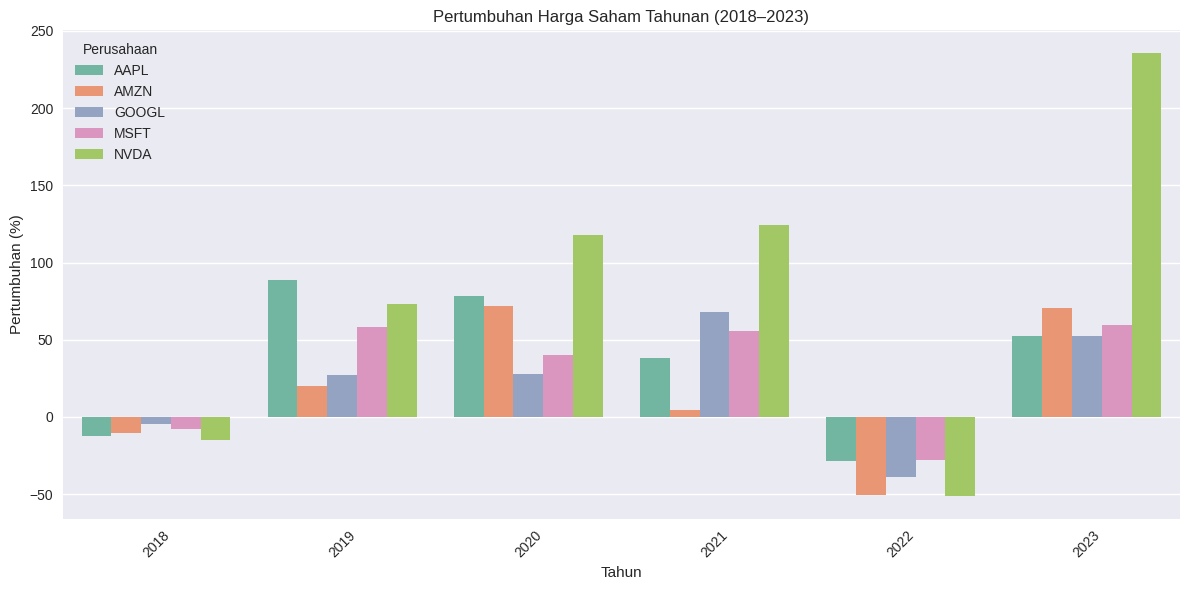

In [28]:
# 📊 Visualisasi: Bar Chart Pertumbuhan Tahunan
plt.figure(figsize=(12, 6))
sns.barplot(data=growth_df, x='Year', y='Annual Growth (%)', hue='Company')
plt.title("Pertumbuhan Harga Saham Tahunan (2018–2023)")
plt.xlabel("Tahun")
plt.ylabel("Pertumbuhan (%)")
plt.legend(title='Perusahaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


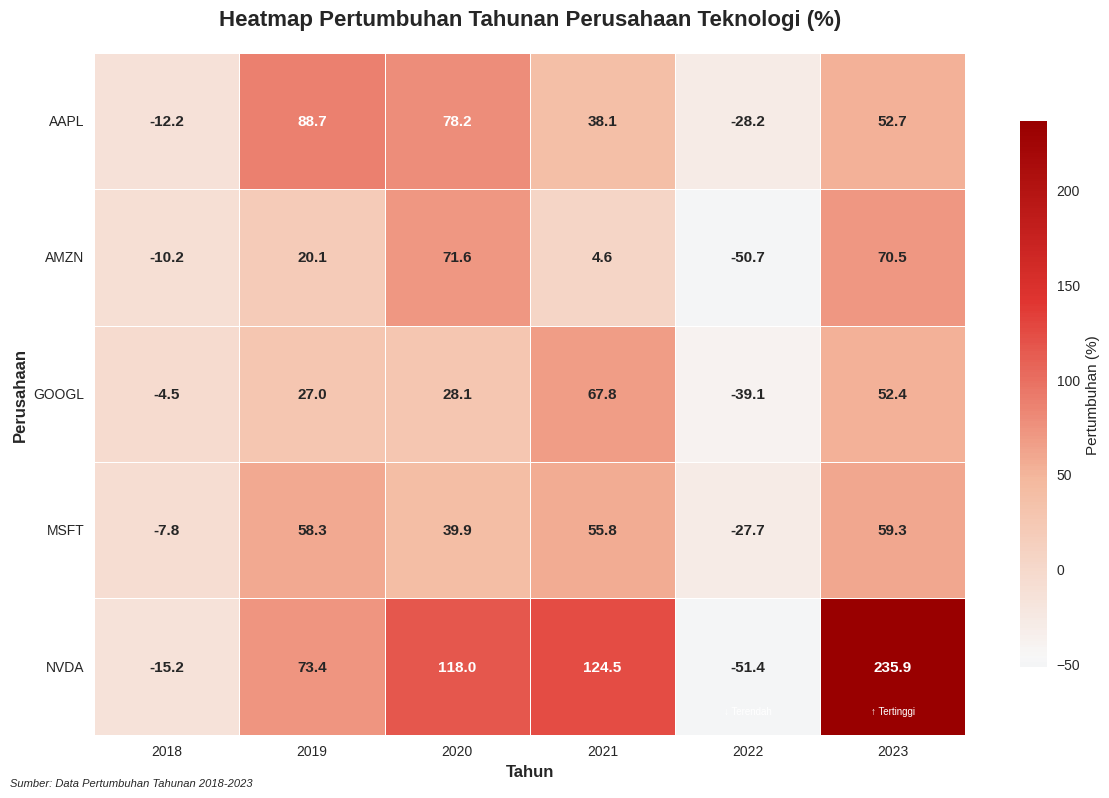

In [ ]:
# Asumsikan data yang sama dengan visualisasi asli
# Membuat data frame dari nilai yang terlihat pada heatmap asli
companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']
years = [2018, 2019, 2020, 2021, 2022, 2023]

# Data pertumbuhan tahunan sesuai dengan nilai dalam visualisasi
data = [
    [-12.15, 88.74, 78.24, 38.06, -28.20, 52.67],  # AAPL
    [-10.25, 20.06, 71.60, 4.64, -50.71, 70.55],   # AMZN
    [-4.53, 26.99, 28.05, 67.83, -39.15, 52.38],   # GOOGL
    [-7.82, 58.26, 39.94, 55.79, -27.69, 59.31],   # MSFT
    [-15.16, 73.41, 118.02, 124.48, -51.44, 235.95] # NVDA
]

# Membuat DataFrame
growth_df = pd.DataFrame(data, index=companies, columns=years)

# Membuat pivot (meskipun data sudah dalam format pivot)
pivot_df = growth_df

# Membuat custom colormap yang lebih menarik
# Warna biru untuk nilai negatif, putih untuk 0, dan gradasi merah untuk nilai positif
colors = ["#3b4cc0", "#b4c4e6", "#f7f7f7", "#f4b99e", "#e03531", "#990000"]
custom_cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=256)

# Mengatur figure size yang lebih besar untuk detail lebih baik
plt.figure(figsize=(12, 8))

# Plot heatmap dengan peningkatan visual
ax = sns.heatmap(pivot_df, 
                annot=True, 
                fmt=".1f", 
                cmap=custom_cmap,
                center=0,
                linewidths=0.5,  # Menambahkan garis pemisah
                linecolor='white',  # Warna garis pemisah
                cbar_kws={'label': 'Pertumbuhan (%)', 'shrink': 0.8},  # Label dan ukuran colorbar
                annot_kws={"size": 11, "weight": "bold"})  # Mempertebal angka

# Menambahkan judul dengan font yang lebih besar dan tebal
plt.title("Heatmap Pertumbuhan Tahunan Perusahaan Teknologi (%)", 
         fontsize=16, 
         fontweight='bold', 
         pad=20)

# Memperbaiki label sumbu
plt.xlabel("Tahun", fontsize=12, fontweight='bold')
plt.ylabel("Perusahaan", fontsize=12, fontweight='bold')

# Menyesuaikan rotasi tick labels untuk keterbacaan yang lebih baik
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Menambahkan grid yang halus untuk membantu melihat pola
ax.set_axisbelow(True)

# Menyesuaikan tampilan seluruh plot
plt.tight_layout()

# Menambahkan anotasi atau catatan kecil
plt.figtext(0.01, 0.01, "Sumber: Data Pertumbuhan Tahunan 2018-2023", 
           fontsize=8, style='italic')

# Untuk menambahkan highlight pada nilai tertinggi dan terendah
highest_value = pivot_df.max().max()
lowest_value = pivot_df.min().min()

# Mencari posisi nilai tertinggi dan terendah
for i in range(len(pivot_df.index)):
    for j in range(len(pivot_df.columns)):
        if pivot_df.iloc[i, j] == highest_value:
            # Menandai sel dengan nilai tertinggi
            plt.text(j + 0.5, i + 0.85, "↑ Tertinggi", 
                    horizontalalignment='center',
                    color='white',
                    fontsize=7)
        if pivot_df.iloc[i, j] == lowest_value:
            # Menandai sel dengan nilai terendah
            plt.text(j + 0.5, i + 0.85, "↓ Terendah", 
                    horizontalalignment='center',
                    color='white',
                    fontsize=7)

plt.show()

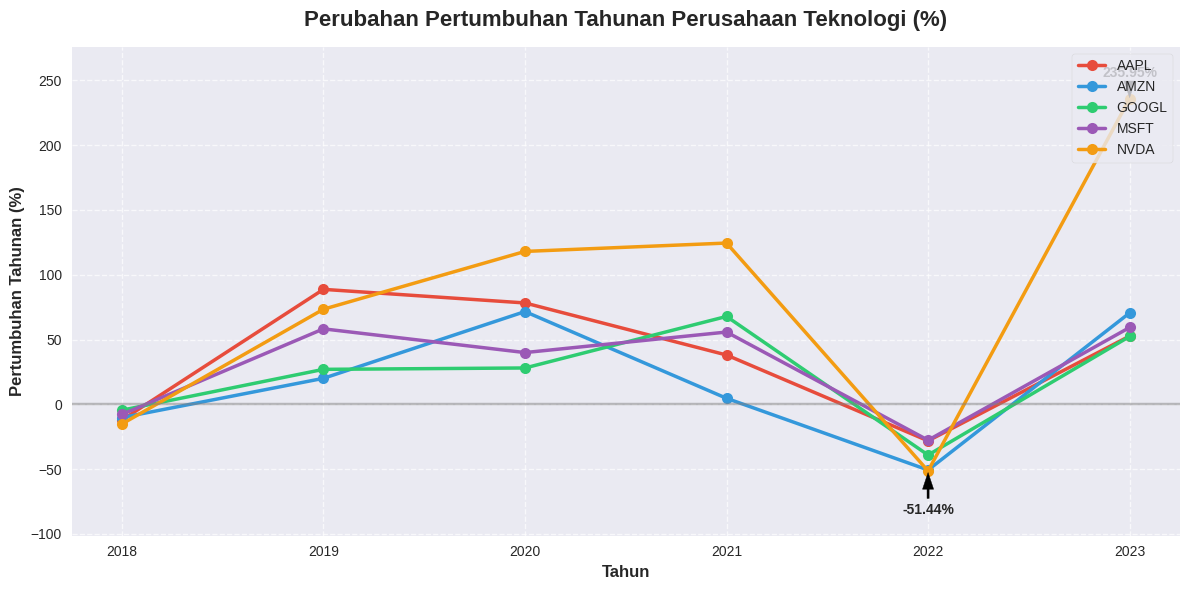

In [38]:
# Data dari heatmap awal (nilai pertumbuhan tahunan dalam %)
companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']
years = [2018, 2019, 2020, 2021, 2022, 2023]

# Data pertumbuhan tahunan sesuai dengan nilai dalam heatmap awal
growth_data = [
    [-12.15, 88.74, 78.24, 38.06, -28.20, 52.67],  # AAPL
    [-10.25, 20.06, 71.60, 4.64, -50.71, 70.55],   # AMZN
    [-4.53, 26.99, 28.05, 67.83, -39.15, 52.38],   # GOOGL
    [-7.82, 58.26, 39.94, 55.79, -27.69, 59.31],   # MSFT
    [-15.16, 73.41, 118.02, 124.48, -51.44, 235.95] # NVDA
]

# Membuat DataFrame
growth_df = pd.DataFrame(growth_data, index=companies, columns=years)

# Membuat grafik garis untuk pertumbuhan tahunan
plt.figure(figsize=(12, 6))

# Warna yang menarik untuk perusahaan
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

# Plot untuk setiap perusahaan
for i, company in enumerate(companies):
    plt.plot(years, growth_df.loc[company], marker='o', markersize=8, 
             label=company, color=colors[i], linewidth=2.5)

plt.title('Perubahan Pertumbuhan Tahunan Perusahaan Teknologi (%)', 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Tahun', fontsize=12, fontweight='bold')
plt.ylabel('Pertumbuhan Tahunan (%)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', frameon=True, fontsize=10)

# Menambahkan garis horizontal pada titik 0 (tidak ada pertumbuhan)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Menyesuaikan label sumbu x agar menampilkan semua tahun
plt.xticks(years)

# Tambahkan nilai pertumbuhan di titik puncak dan titik terendah
ymax = growth_df.values.max()
ymin = growth_df.values.min()
xmax = years[np.where(growth_df.values == ymax)[1][0]]
xmin = years[np.where(growth_df.values == ymin)[1][0]]
company_max = companies[np.where(growth_df.values == ymax)[0][0]]
company_min = companies[np.where(growth_df.values == ymin)[0][0]]

plt.annotate(f'{ymax:.2f}%', xy=(xmax, ymax), xytext=(xmax, ymax+20),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             ha='center', va='center', fontweight='bold')

plt.annotate(f'{ymin:.2f}%', xy=(xmin, ymin), xytext=(xmin, ymin-30),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             ha='center', va='center', fontweight='bold')

# Menyesuaikan batas sumbu y untuk memastikan semua anotasi terlihat
plt.ylim(ymin-50, ymax+40)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

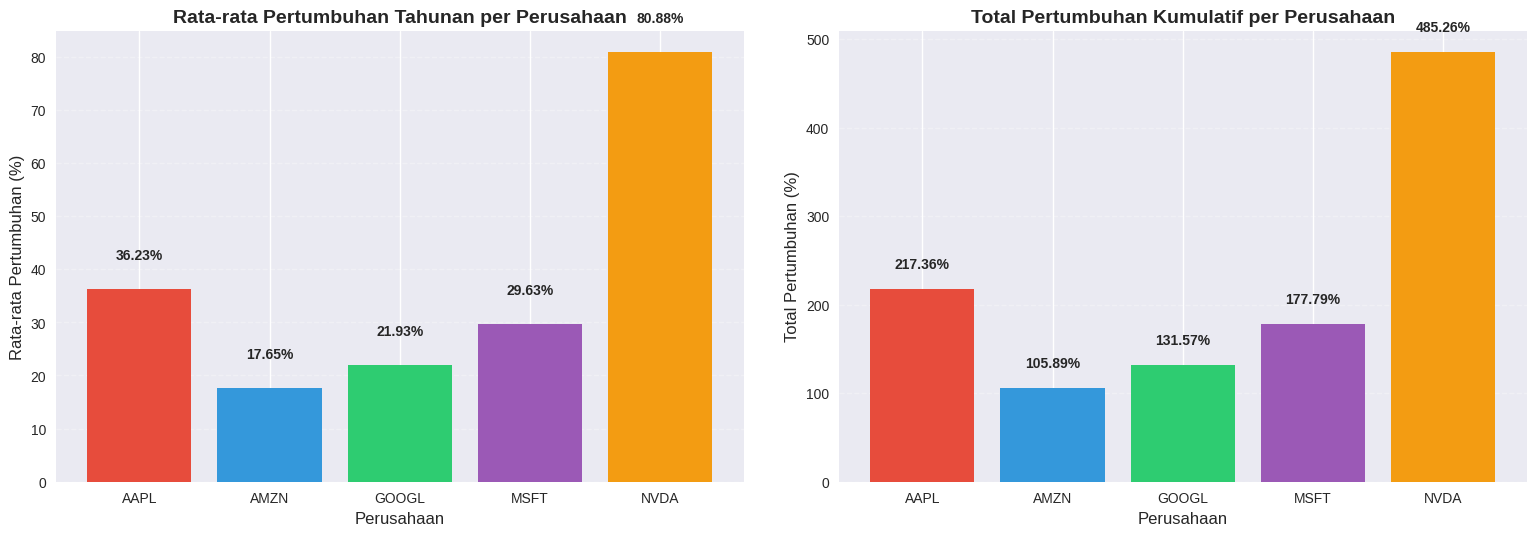

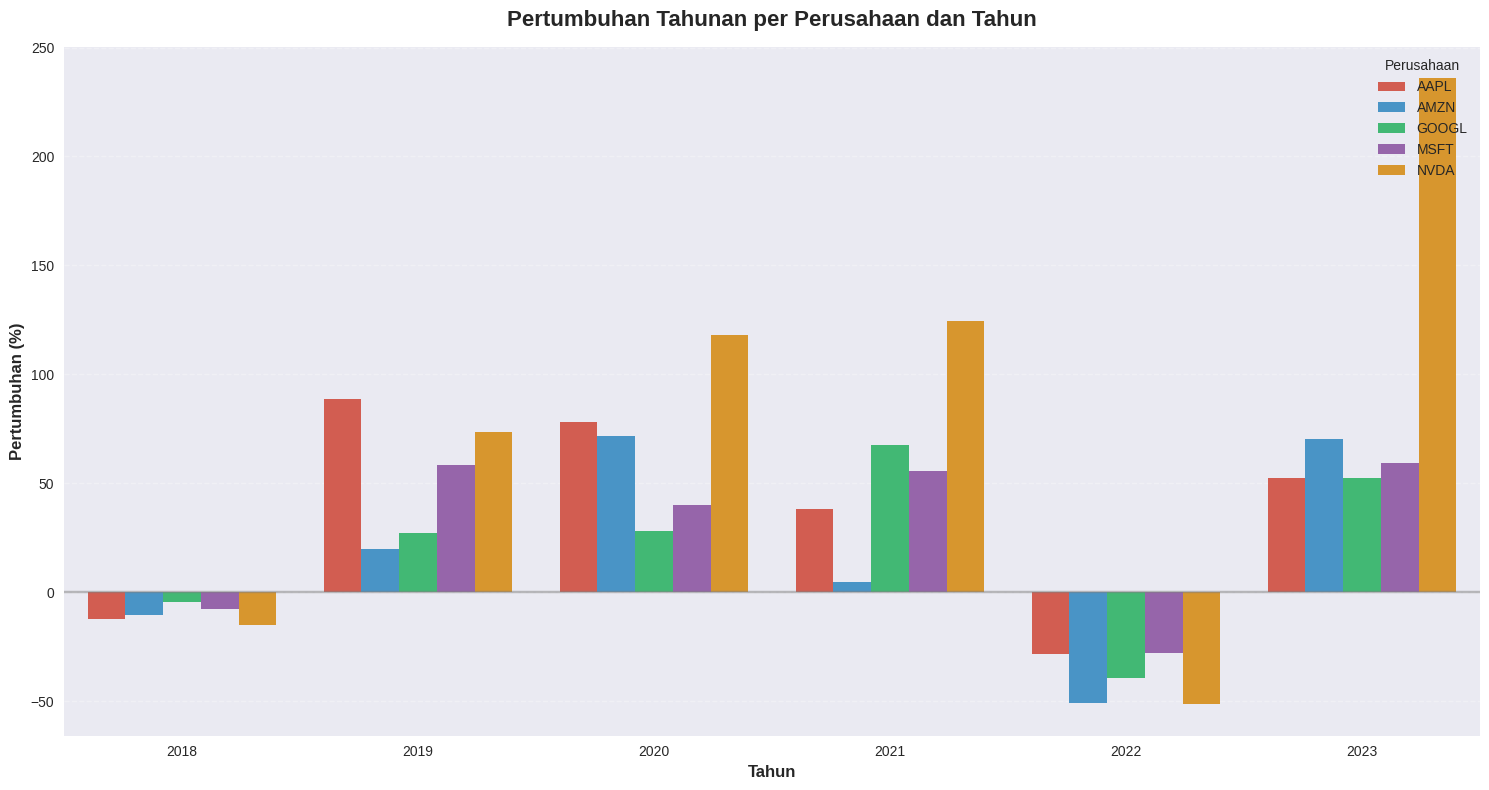

In [39]:
# Data dari heatmap awal (nilai pertumbuhan tahunan dalam %)
companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']
years = [2018, 2019, 2020, 2021, 2022, 2023]

# Data pertumbuhan tahunan sesuai dengan nilai dalam heatmap awal
growth_data = [
    [-12.15, 88.74, 78.24, 38.06, -28.20, 52.67],  # AAPL
    [-10.25, 20.06, 71.60, 4.64, -50.71, 70.55],   # AMZN
    [-4.53, 26.99, 28.05, 67.83, -39.15, 52.38],   # GOOGL
    [-7.82, 58.26, 39.94, 55.79, -27.69, 59.31],   # MSFT
    [-15.16, 73.41, 118.02, 124.48, -51.44, 235.95] # NVDA
]

# Membuat DataFrame
growth_df = pd.DataFrame(growth_data, index=companies, columns=years)

# Mengubah format data untuk grafik batang - rata-rata pertumbuhan per perusahaan
avg_growth = growth_df.mean(axis=1).reset_index()
avg_growth.columns = ['Perusahaan', 'Rata-rata Pertumbuhan (%)']

# Menghitung total pertumbuhan kumulatif per perusahaan
total_growth = growth_df.sum(axis=1).reset_index()
total_growth.columns = ['Perusahaan', 'Total Pertumbuhan Kumulatif (%)']

# Membuat visualisasi grafik batang
plt.figure(figsize=(16, 6))

# Warna batang yang menarik
bar_colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

# Plot 1: Grafik batang untuk rata-rata pertumbuhan
plt.subplot(1, 2, 1)
bars1 = plt.bar(avg_growth['Perusahaan'], avg_growth['Rata-rata Pertumbuhan (%)'], 
        color=bar_colors)
plt.title('Rata-rata Pertumbuhan Tahunan per Perusahaan', 
          fontsize=14, fontweight='bold')
plt.xlabel('Perusahaan', fontsize=12)
plt.ylabel('Rata-rata Pertumbuhan (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Menambahkan nilai di atas setiap bar
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.2f}%',
             ha='center', va='bottom', fontweight='bold')

# Plot 2: Grafik batang untuk total pertumbuhan kumulatif
plt.subplot(1, 2, 2)
bars2 = plt.bar(total_growth['Perusahaan'], total_growth['Total Pertumbuhan Kumulatif (%)'], 
        color=bar_colors)
plt.title('Total Pertumbuhan Kumulatif per Perusahaan', 
          fontsize=14, fontweight='bold')
plt.xlabel('Perusahaan', fontsize=12)
plt.ylabel('Total Pertumbuhan (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Menambahkan nilai di atas setiap bar
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{height:.2f}%',
             ha='center', va='bottom', fontweight='bold')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout(pad=3.0)
plt.show()

# Alternatif: Visualisasi batang untuk pertumbuhan tahunan setiap perusahaan per tahun
plt.figure(figsize=(15, 8))

# Membuat data dalam format yang sesuai untuk barplot
growth_melted = growth_df.reset_index().melt(id_vars='index', var_name='Tahun', value_name='Pertumbuhan (%)')
growth_melted.columns = ['Perusahaan', 'Tahun', 'Pertumbuhan (%)']

# Menggunakan seaborn untuk visualisasi yang lebih menarik
ax = sns.barplot(x='Tahun', y='Pertumbuhan (%)', hue='Perusahaan', 
                data=growth_melted, palette=bar_colors)

plt.title('Pertumbuhan Tahunan per Perusahaan dan Tahun', 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Tahun', fontsize=12, fontweight='bold')
plt.ylabel('Pertumbuhan (%)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.legend(title='Perusahaan', loc='upper right')

# Menambahkan garis horizontal pada titik 0 (tidak ada pertumbuhan)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()